# Linear regression with multiple variables

#### The file ex1data2.txt contains a training set of housing prices in Port-land, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.
#### In part 1: We used Gradient Descent and Normal Equations
#### In part 2:

###### part 1:

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pylab as plt

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
data=pd.read_csv('ex1data2.txt', header = None)
data.columns=['size_ft²','nbre_bedrooms','price']
data

,size_ft²,nbre_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [4]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values
m=y.size

In [5]:
def featureNormalize(X):    
    X_norm=X.copy()
    mu = np.zeros(X.shape[1])
    sigma=np.zeros(X.shape[1])
    for i in range(X.shape[1]):
        v=X[:,i]
        mu[i]=v.mean()
        sigma[i]=v.std()
    X_norm=(X_norm-mu)/sigma
    return X_norm, mu, sigma


In [6]:
X_norm, mu, sigma = featureNormalize(X)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: [2000.68085106    3.17021277]
Computed standard deviation: [7.86202619e+02 7.52842809e-01]


In [7]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [8]:
def computeCostMulti(X, y, theta):
    J=0
    m=y.shape[0]
    a=np.dot(X,theta)
    b=a-y
    t=b.T
    J=(1/(2*m))*np.dot(t,b)
    return J

In [9]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    J_history = []
    m = y.shape[0]
    J_history = np.zeros(num_iters)
    theta=theta.copy()
    for i in range(num_iters):
        h=np.dot(X,theta)
        theta = theta-alpha/m*((h-y).T.dot(X))
        J_history[i] = computeCostMulti(X, y, theta)
    return theta, J_history

In [10]:
alpha = 0.01;
num_iters = 400;

Text(0, 0.5, 'Cost J')

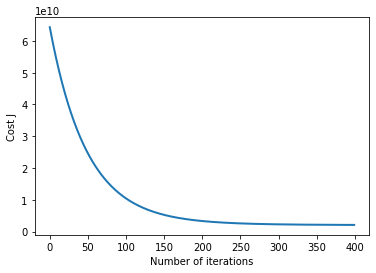

In [11]:
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

In [12]:
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)
# get the cost (error) of the model
print ('Further testing and calculate theta after performing gradient decent:',computeCostMulti(X,y,theta))

Further testing and calculate theta after performing gradient decent: 2044562883.369333


theta: [340302.97100295 107744.19899198  -4875.11193358]


Text(0, 0.5, 'Cost_J')

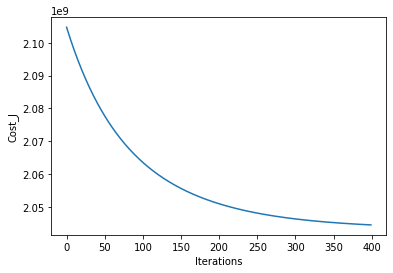

In [18]:
print('theta:', theta.ravel())

plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost_J')


In [14]:
data=pd.read_csv('ex1data2.txt', header = None)
data.columns=['size_ft²','nbre_bedrooms','price']
data

,size_ft²,nbre_bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900
5,1985,4,299900
6,1534,3,314900
7,1427,3,198999
8,1380,3,212000
9,1494,3,242500


In [15]:
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values
m=y.size

In [16]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [19]:
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [21]:
theta3 = normalEqn(X,y)
print (theta3)

[89597.9095428    139.21067402 -8738.01911233]


In [22]:
#Predicted price for a 1650 sq-ft, 3 br house (using normal equations)
price = np.array([(np.ones(1)), 1650, 3]).dot(theta3)
print ('Predicted price for a 1650 sq-ft, 3 br house (using normal equations):', price)

Predicted price for a 1650 sq-ft, 3 br house (using normal equations): [293081.46433489]


#### Part 2